# Lab 8

Assigned: April 11, 2018

Due: April 16, 2018 at 11:59pm

### Problem 1: Quantum Search and Quantum Simulation

In [1]:
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
from qutip import *
import Qconfig
import numpy as np
import cmath
import matplotlib.pyplot as plt

In this problem, we're going to examine the connection between quantum search and quantum simulation. Let's suppose that the initial state of our quantum computer is $|\psi\rangle$, and the goal of our search algorithm is to transform the initial state into the target state $|x\rangle$. Can we find a Hamiltonian that will cause such an evolution? Yes! We'll see how this works for a $3$ qubit quantum computer.

In the following exercises, feel free to use any module you like (numpy, QuTiP, QISKit, etc). If you'd like to see a more general treatment of this topic, please take a look at Section 6.2 of Nielsen and Chuang's _Quantum Computation and Quantum Information_.

(a) Let's suppose our initial state $|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{i=0}^{2^n-1}|i\rangle$ is an equal superposition of computational basis states and the target state is $|x\rangle=|101\rangle$. Construct and print both states.

In [2]:
# going to use QuTip cuz it's the best

# making all basis states for 3-qubits
state1 = basis(8,0) # |000>
state2 = basis(8,1) # |001>
state3 = basis(8,2) # |010>
state4 = basis(8,3) # |011>
state5 = basis(8,4) # |100>
state6 = basis(8,5) # |101>
state7 = basis(8,6) # |110>
state8 = basis(8,7) # |111>

# make |psi> as superposition of all basis
psi = (state1 + state2 + state3 + state4 + state5 + state6 + state7 + state8) / np.sqrt(8)
display(psi)

# make target states
target_state = state6 # |101>
display(target_state)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

(b) We can write $|\psi\rangle = \alpha |x\rangle + \beta |y\rangle$ for some normalized state $|y\rangle$ orthogonal to $|x\rangle$, with $\alpha$ and $\beta$ both real and nonnegative. Find and print $\alpha$, $\beta$, and the state $|y\rangle$.

In [3]:
# beta*|y> will be complement of |psi> - alpha|x>
# therefore, alpha = 0.354 (1/root(8))
alpha = 1 / np.sqrt(8)
display(alpha) # basically 0.354 if we round

# check that they indeed combine
beta_y = psi - alpha * target_state

# therefore, we can get |y> not normalized and normalize it
y_non_normalized = state1 + state2 + state3 + state4 + state5 + state7 + state8
y_normalized = y_non_normalized / y_non_normalized.norm()
display(y_normalized)

# verify that |x> and |y> are orthogonal
target_state.trans() * y_normalized # yes, they are orthogonal, this is 0

# get beta (want 0.378 * beta = 0.354)
beta = (1 / np.sqrt(8)) / (1 / y_non_normalized.norm())
display(beta) # 0.936

# verify that it matches |psi>
alpha * target_state + beta * y_normalized # yes it's the same

0.35355339059327373

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.37796447]
 [ 0.37796447]
 [ 0.37796447]
 [ 0.37796447]
 [ 0.37796447]
 [ 0.        ]
 [ 0.37796447]
 [ 0.37796447]]

0.93541434669348533

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

(c) Construct and print the Hamiltonian $H = |x\rangle \langle x| + |\psi \rangle \langle \psi|$.

In [4]:
# make the Hamiltonian according to specifications
H = target_state * target_state.trans() + psi * psi.trans()
display(H)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  1.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]
 [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]]

(d) Find and print the state of the quantum computer at $5$ times equally spaced between $0$ and $\frac{2\pi}{\alpha}$ (including the endpoints). You may assume that $\hbar = 1$, so that the time-evolution operator is $U = e^{-i H t}$. Do you see any similarity in the states at time $t = 0$ and $t = \frac{2\pi}{\alpha}$?

In [5]:
# making the 5 time intervals
endtime = (2 * np.pi / (1 / np.sqrt(8))) # ending time
times = [endtime*0.0, endtime*0.25, endtime*0.50, endtime*0.75, endtime*1.0]

# get all the evolutions of |psi>
for t in times:
    U = (-1j * H * t).expm()
    display(U * psi)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.96390253+0.26625534j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.69057098+0.72326463j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]]

# What we see between t = 0 and t = 2pi/alpha

As we can see, t=0 and t=2pi/alpha are the same states up to a phase (if we compute their magnitudes, we can see that they are the same). Therefore, we can see that t = 2pi/alpha is the period of the qubit time evolution function.

(e) The analytical expression for the state at time $t$ is  $\exp(-it) \left(\cos(\alpha t) |\psi\rangle - i \sin(\alpha t)  |x\rangle \right)$. (This is derived in Nielsen and Chuang Section 6.2, if you're interested in the details.) Use this formula to calculate the state at the same times used in part (d). Check that your results are consistent with part (d). 

In [6]:
# define function for the analytical expression
def analytical_expression(t):
    return cmath.exp(-1j * t) * (cmath.cos(alpha * t) * psi - (-1j) * cmath.sin(alpha * t) * target_state)

# calculate all the states
for t in times:
    display(analytical_expression(t))

# yes, they are all the same as in (d)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [-0.96390253-0.26625534j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]
 [ 0.30342524+0.18147485j]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [-0.69057098-0.72326463j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]
 [ 0.16725552+0.31148931j]]

(f) Using the analytical formula for $\exp(-i H t)$ in part (e), find and print the shortest time $t$ that you need to wait to transform from $|\psi\rangle$ to $|x\rangle$. Check that the right state is created.

In [7]:
# we want to find when sin is 1 so that cosine is 0 and we only have |x>
# sin is at pi/2, therefore pi/2 = alpha * t
# therefore, shortest_time = pi/2alpha
shortest_time = np.pi / (2 * alpha)
display(shortest_time)

# verifying that the state works
display(analytical_expression(shortest_time)) # yes this is correct if we normalize (due to i shift)

4.4428829381583661

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [-0.96390253-0.26625534j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

### Problem 2: Quantum Error Correcting Codes

In this problem, we will examine some basic exmples of quantum error correction. In general, quantum error correction is a complicated subject, and many aspects of it are areas of open research. However, it is an extremely important topic if we want to learn how to get the most out of quantum computers, because computers are not particularly useful if we cannot trust that their results are (reasonably) error free. 

First, let's take a look at an example of a classical error correcting code called a *repetition code*. In a repetition code, we simply take each classical bit and replace it with some odd number of copies. For example, we could map:
\begin{align}
0 &\rightarrow 000 \\
1 &\rightarrow 111
\end{align}
Assume that after we encode these bits we send them through a noisy channel that flips one of the bits with probability $p$. To see if there is an error, we then look at the result and take a majority vote. So, say we send some bits in and we get out $010$. We then take a majority vote to figure out what the original bits were. That is, in the above, we would assume that there was an error on the second bit and that the bits should be $000$.  

a) Assuming that the error on each bit is independent, what is the probability that there are two or more errors (that is, two or more of the bits are flip)? Another way to phrase this is, what is the probability that your majority rule method gives you the **wrong** answer for the three-bit repetition code? For what probabilities $p$ do you get an improvement by using this majority rule voting?

# Probability to make two or more errors

The probability to make a single bitflip is p. Therefore, the probability to make two bit flips is p * p, or p^2. The probability to make two or more (3) bitflips is therefore p^2 + p^3. Another way to show this is to say that the probability of having two bit flips is 1 - (the probability of having no bit flip + the probablity of having only 1 bit flip), which is 1 - ((1 - p)^3 + p).

You will get an improvement by using this majority rule voting as long as the probablity of bitflipping is lower than the probability of non-bitflipping. For instance, if the probablity of a bit flip is 0.3, then it will be an improvement since you are more likely to have a majority of non-flipped bits than to have a majority of flipped bits. However, if the probability p of bit flipping is 0.9, then it won't be an improvement since it is more likely that we have a majority of flipped bits than a majority of non-flip bits. Therefore, it is an improvement as long as p is between 0 and 0.50. 

b) Naively, we would want to do this same procedure with qubits by sending the state:
\begin{equation}
\left|\psi\right\rangle \rightarrow \left|\psi\right\rangle\left|\psi\right\rangle\left|\psi\right\rangle
\end{equation}
Briefly explain why this procedure is not allowed. Furthermore, even if it were allowed, explain why the above procedure, which involves looking at the individual bits and observing their values, would not necessarily work for quantum states even if you could copy them. Finally, for quantum states, are bit flip errors the only errors we need to worry about?

# Why is this procedure not allowed?

It is not allowed because it would require us to clone the state. We know, from the no-cloning theorem, that it is physically impossible to perfectly clone a state, which means that the best we could do would be to have these 3 states slightly different from each other, which defeats the whole purpose. As a result, this procedure does not physically works, even if it might seem a good approach at first sight.

# Why would it not work even if cloning was allowed?

It would not work even if cloning was allowed because, as the problem specifies, this procedure involves LOOKING at the individuals bits and OBSERVING their values. Therefore, in order to be able to clone them and such, we would need to measure the bits, which would collapse the quantum superposition and render them useless for future computations, which once again defeats the purpose of quantum computers, thus making this method useless even if cloning was possible.

# Is bit flip the error type of error to worry about?

No, we also have the phase shift error (shifting the sign of the state) and really any continuous error on the Bloch sphere (which really englobe phase shift error and bit flip error, but we can still define them as separate errors because phase shift and bit flip are very common and standard errors).

We will see, however, that it is still possible to protect against bit flip errors with some  work. Consider a noisy channel that flips bits with probability $p$. That is, with probability $p$, the channel sends $\left|\psi\right\rangle \rightarrow X\left|\psi\right\rangle$. Furthermore, suppose that we encode an arbitrary qubit:
\begin{equation}
a\left|0\right\rangle + b\left|1\right\rangle \rightarrow a\left|000\right\rangle + b\left|111\right\rangle = a\left|0\right\rangle_{L} + b\left|1\right\rangle_{L}
\end{equation}
c) Briefly explain why this type of encoding is allowed even considering your answer to part b) (*Hint*: $\left|0\right\rangle$ and $\left|1\right\rangle$ have a special property that allows for this. If you get stuck, look up the "No-Cloning Theorem" on Wikipedia). Come up with a circuit to perform this encoding (*Hint*: You will need two ancillary bits initialized to be $\left|0\right\rangle$. The circuit is one that we have worked with a few times before). 

# Why this type of encoding works?

This encoding works because it is not cloning per se. First of all, it reveals nothing about the coefficient a and b, which means that this type of encoding transformation does not reveal the superposition, and hence does not collapse the quantum state of the bits. Furthermore, we can replicate the single-qubits |0> and |1> because they are our basis states. We are capable of producing new qubits for those states and thus can use them to produce the triple-qubits encoding.

As for the circuit, I have found a screenshot while reading QEC that perfectly summarizes the circuit and I believe this is a much more clear picture than what what I could explain only with words so I attached it below. The figure was taken from: QEC - Preskill (from the Files on Canvas), page 8. 

Simply, we used the two ancillary qubits to measure the state of the data qubits halfway through and use CNOTs to modify the states (working like "if statements") if an error is detected. This circuit corrects for a single bit flip error (sigma_x operation). We are then guaranteed that there are no errors in our qubit state |psi> after the operations have been performed and we can move on to use this qubit since its quantum properties have been preserved by the use of ancillary qubits.



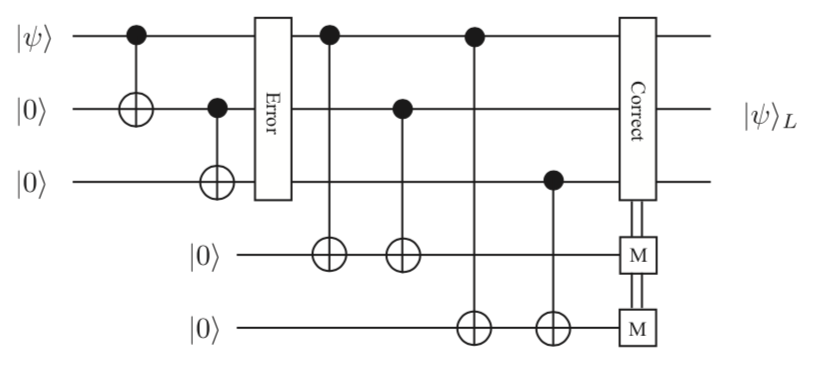



d) Assume that $p$ is small enough that the probability of two or three bit flips is negligible. Consider the possible zero or single bit flip operations for the encoded qubit:
\begin{align}
a\left|000\right\rangle + b\left|111\right\rangle &\rightarrow a\left|000\right\rangle + b\left|111\right\rangle \\
a\left|000\right\rangle + b\left|111\right\rangle &\rightarrow a\left|100\right\rangle + b\left|011\right\rangle \\
a\left|000\right\rangle + b\left|111\right\rangle &\rightarrow a\left|010\right\rangle + b\left|101\right\rangle \\
a\left|000\right\rangle + b\left|111\right\rangle &\rightarrow a\left|001\right\rangle + b\left|110\right\rangle 
\end{align}
Consider the operators $Z_{1}Z_{2}$ and $Z_{2}Z_{3}$. Show that each of the above states is an eigenstate of these operators. What are their eigenvalues? You may do this in qutip or analytically. Given that each of these states is an eigenstate of these operators, if you were to measure one of these operators for any of the above state, what would happen? Furthermore, show that $Z_{1}Z_{2}$ and $Z_{2}Z_{3}$ commute. What does this tell us about the order in which we have to measure these operators?

In [18]:
# generating the operator Z_1Z_2 and Z_2Z_3
Z1Z2 = tensor(sigmaz(), sigmaz(), identity(2))
Z2Z3 = tensor(identity(2), sigmaz(), sigmaz())
display(Z1Z2)
display(Z2Z3)

# showing that they commute
display(Z1Z2 * Z2Z3 - Z2Z3 * Z1Z2) # since the result is zero, we know that they commute
# as a result, we know that the order in which we have to measure these operators does not matter. We could
# measure them in any order and would get the same result.

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

In [16]:
# getting the eigenstates of Z1Z2:
for i in range(8): # 8 because we have 2^3 basis states
    display(Z1Z2.eigenstates()[1][i]) # eigenvector
    print("Eigenvalue = ", Z1Z2.eigenstates()[0][i]) # eigenvalue

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Eigenvalue =  1.0


In [19]:
# getting the eigenstates of Z2Z3:
for i in range(8): # 8 because we have 2^3 basis states
    display(Z2Z3.eigenstates()[1][i]) # eigenvector
    print("Eigenvalue = ", Z2Z3.eigenstates()[0][i]) # eigenvalue


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Eigenvalue =  -1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Eigenvalue =  1.0


Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Eigenvalue =  1.0


# What would happen if we measured?

As we can see from the QuTip analysis of the eigenvalues above, the eigenvectors for Z1Z2 and Z2Z3 are equivalent. This intuitively makes sense. However, the eigenvalues for an eigenvector might be different. This also intuitively makes sense. If we look at the prinout of Z1Z2 and Z2Z3, they are two diagonal matrices and thus the values on the diagonal are the eigenvalues, and we can see that there are some sign differences. The eigenvalues are either 1 and -1 or -1 and 1 (sign inverted, but always the same magnitude). 

This signifies that measuring the operator in a state with an error (bit flip) will produce a specific eigenstate of the operator being outputted (the same eigenstate for both operators, since we have shown they have the same eigenstates, but a different associated eigenvalue of -1 or +1 depending on which operator). This indicates which bit has been flipped depending on which eigenvalue we measure.

e) Using what you learned above, devise a scheme to correct an arbitrary single bit-flip error for the 3-qubit code.

# 3-qubits code

From what we have established in the past few exercises, we can see that depending on what states (and its eigenvalue) the operators Z1Z2 and Z2Z3 collapse when measuring a 3-qubits states, we can uniquely determine which bit was flipped. We can now generalize this procedure for a 3-qubit error correction code by extending our single-qubit error correcting code from above.

Simply, by extending our qubit representation to 3-qubits, where |000> is (1 0 0 0 0 0 0 0)^T and |111> is (0 0 0 0 0 0 0 1)^T, we can generalize our code. If we make a measurement with the operators Z1Z2 and Z2Z3 and collapse into anything but |000> and |111>, we can uniquely determine from the eigenstates (and eigenvalues) of the two operators which bit has been flipped.